In [310]:
import pandas as pd
from matplotlib import pyplot as plt
#from ydata_profiling import ProfileReport

In [311]:
df = pd.read_excel('Performance-Degradation Data Nelson.xlsx') #Import dataset
ypro = ProfileReport(df)
ypro.to_file('Performance-Degradation Data Nelson.html') #Statistical chracteristics of data
print(df.tail())
print(df.describe())
df.head()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

       y  x1   x2
123  7.6  64  250
124  1.5  64  275
125  1.0  64  275
126  1.2  64  275
127  1.2  64  275
                y          x1          x2
count  128.000000  128.000000  128.000000
mean    11.238047   21.875000  232.500000
std      4.166401   22.270704   35.227048
min      1.000000    1.000000  180.000000
25%     10.000000    3.500000  213.750000
50%     12.000000   12.000000  237.500000
75%     13.525000   36.000000  256.250000
max     18.500000   64.000000  275.000000


,y,x1,x2
0,15.0,1,180
1,17.0,1,180
2,15.5,1,180
3,16.5,1,180
4,15.5,1,225


In [312]:
import numpy as np

X1 = df.iloc[:,1].to_numpy()
X1.shape
X2 = df.iloc[:,-1].to_numpy()
print(type(X1))
#X1.shape
y = df.iloc[:, 0].to_numpy()
#X1.shape
#X2.shape0
X = np.zeros((128,2))
for i in range(len(X1)):
    X[i,0] = X1[i]
    X[i,1] = X2[i]
X

X0 = np.ones(len(X1))
X = np.c_[X0,X]            #add x0 = 1 to the function (bias)
X_numer  = df[['x1','x2']]
y_numer = df[['y']]
#type(X_numer)
#type(y_numer)

<class 'numpy.ndarray'>


C:\Users\moham\AppData\Local\Temp\ipykernel_14820\4282184082.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X[:,0],X[:,1],X[:,2],cmap = 'virdis')


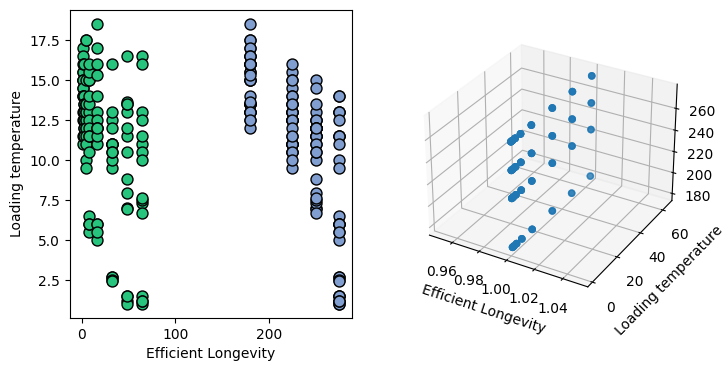

In [313]:
fig  = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(X2, y, color = '#809ecf', s = 250, marker = '.', edgecolor = 'black')
ax.scatter(X1, y, color = '#27c47e', s = 250, marker = '.', edgecolor = 'black')
plt.xlabel("Efficient Longevity", fontsize = 10)
plt.ylabel("Loading temperature", fontsize = 10)
ax = fig.add_subplot(1,2,2,projection = '3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2],cmap = 'virdis')
plt.xlabel("Efficient Longevity", fontsize = 10)
plt.ylabel("Loading temperature", fontsize = 10)
plt.show()

In [314]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test \
 = train_test_split(X, y, test_size=0.2, random_state=0) 

## Regression formula
## y = t0 + t1*x1 + t2*x2 + ... tn*xn

## Analytical solution

In [315]:
theta_coef = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print(f"Theta coefficients' array by analytical estimation is: \n {theta_coef}")
y_pred_a = X_test.dot(theta_coef)

Theta coefficients' array by analytical estimation is: 
 [32.35742375 -0.08096706 -0.08307881]


## Numerical solution

In [316]:
from sklearn import linear_model 
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

In [317]:
X_train, X_test, y_train, y_test \
 = train_test_split(X_numer, y_numer, test_size=0.2, random_state=42) 

In [318]:
regr = linear_model.LinearRegression() # True boolean is not acceptable 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"Regressor Score is: {regr.score(X_train, y_train)}")
regr_coef = regr.coef_
#regr_coef[0] = regr.intercept_
print(f"Regressor coefficients' array is: {regr_coef}")
print(f"Regressor intercept is:{regr.intercept_}")

Regressor Score is: 0.709740790917744
Regressor coefficients' array is: [[-0.08394983 -0.08480328]]
Regressor intercept is:[32.80169832]


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error:** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


- **MAE** is the easiest to understand, because it's the average error.
- **R2 score** regression score function. Best possible score is 1.0


In [319]:
print(f"R2 score of regression (linear kernel): {r2_score(y_test, y_pred)}")     
#print(f"mean square error (MSE): {mean_squared_error(y_test,y_pred)}")
print(f"mean absolute error (MAE): {mean_absolute_error(y_test,y_pred)}")

R2 score of regression (linear kernel): 0.6625617958417134
mean absolute error (MAE): 1.7198387615611008


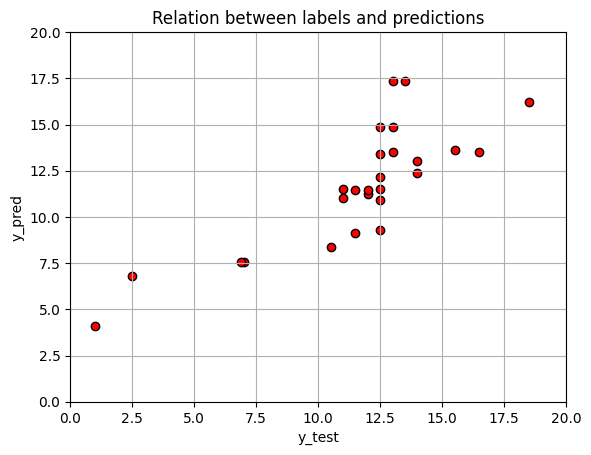

linear regression score :
 {'fit_time': array([0.        , 0.        , 0.01562524, 0.        ]), 'score_time': array([0., 0., 0., 0.]), 'test_score': array([0.73963469, 0.7554604 , 0.73534882, 0.45201124])}


In [320]:
plt.scatter(y_test,y_pred,c= 'r',edgecolor = 'black')
plt.title('Relation between labels and predictions')
plt.grid()
plt.ylim(0,20)
plt.xlim(0,20)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()
cv = KFold(n_splits=4,random_state = None , shuffle = True)  #Larger values specify stronger regularization. 

print("linear regression score :\n",cross_validate(regr2,X_train,y_train,cv = cv))
# if linear relation demonstrates, regression will be good 

In [321]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import sigmoid_kernel, rbf_kernel,polynomial_kernel
from sklearn.model_selection import cross_validate,cross_val_score

#Kernel ridge regression (KRR) combines Ridge regression and classification 
#(linear least squares with l2-norm regularization) with the kernel trick. 
#It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, 
#this corresponds to a non-linear function in the original space.

In [322]:
KR_rbf = KernelRidge(alpha=0, kernel='rbf', kernel_params=None)
KR_sig = KernelRidge(alpha=0, kernel='sigmoid', kernel_params=None)
KR_poly = KernelRidge(alpha=0, kernel='polynomial', degree=2, coef0=1, kernel_params=None)
KR_rbf.fit(X_train,y_train)
KR_sig.fit(X_train,y_train)
KR_poly.fit(X_train,y_train)
cv = KFold(n_splits=4,random_state = None , shuffle = False)  

#print("rbf kernel:\n",cross_validate(KR_rbf,X_train,y_train,cv = cv))
#print("sigmoid kernel:\n",cross_validate(KR_sig,X_train,y_train,cv = cv))
#print("polynomial kernel:\n",cross_validate(KR_poly,X_train,y_train,cv = cv))

kernel_names = ['rbf','sigmoid','polynomial']
kernels = [KR_rbf,KR_sig,KR_poly]
cv_score = np.zeros((3,4))
for i in range(len(kernels)):
    cv_score[i,:] = cross_val_score(kernels[i], X_train,y_train, cv=cv)
    print(f"Cross validation score of {kernel_names[i]}: {cross_val_score(kernels[i], X_train,y_train,cv=cv)}")  
    print(f"Average score value of cross validation of {kernel_names[i]}: {np.mean(cv_score[i,:])}")
    #print(cv_score)
    
kernel_pred = np.zeros((3,len(y_test)))

for i in range(len(kernels)):
    kernel_pred[i,:] = kernels[i].predict(X_test).reshape(1,-1)
    #print(kernel_pred)
    print(f"R2 score of {kernel_names[i]}: {r2_score(y_test,kernel_pred[i,:])}")

Cross validation score of rbf: [-0.43688952  0.8297297  -0.00849316  0.49148194]
Average score value of cross validation of rbf: 0.21895724036955264


C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singul

Cross validation score of sigmoid: [-0.00451363 -0.10052929 -0.16783875 -0.03963897]
Average score value of cross validation of sigmoid: -0.07813016044131404
Cross validation score of polynomial: [0.85477718 0.81742855 0.86132042 0.79770564]
Average score value of cross validation of polynomial: 0.8328079475518199
R2 score of rbf: 0.8134040958273688
R2 score of sigmoid: -0.019665915985211724
R2 score of polynomial: 0.777834115701012


C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singul

## Section B

### Alpha = 1 ( Larger alpha values specify stronger regularization)

In [323]:
KR_rbf1 = KernelRidge(alpha=1, kernel='rbf')
KR_sig1 = KernelRidge(alpha=1, kernel='sigmoid')
KR_poly1 = KernelRidge(alpha=1, kernel='polynomial', degree=2, coef0=1)
KR_rbf1.fit(X_train,y_train)
KR_sig1.fit(X_train,y_train)
KR_poly1.fit(X_train,y_train)

cv_score1 = np.zeros((3,4))
kernels1 = [KR_rbf1,KR_sig1,KR_poly1]

for i in range(len(kernels)):
    cv_score1[i,:] = cross_val_score(kernels1[i], X_train,y_train, cv=cv)
    print(f"Cross validation score of {kernel_names[i]}: {cross_val_score(kernels1[i], X_train,y_train,cv=cv)}")  
    print(f"Average score value of cross validation of {kernel_names[i]} (for alpha=1): {np.mean(cv_score1[i,:])}")
    #print(cv_score)

kernel_pred1 = np.zeros((3,len(y_test)))
for i in range(len(kernels1)):
    kernel_pred1[i,:] = kernels1[i].predict(X_test).reshape(1,-1)
    #print(kernel_pred)
    print(f"R2 score of {kernel_names[i]}: {r2_score(y_test,kernel_pred1[i,:])}")

Cross validation score of rbf: [-1.01937804 -0.32869945 -0.5618728  -0.76311131]
Average score value of cross validation of rbf (for alpha=1): -0.6682653983612952
Cross validation score of sigmoid: [-0.00128905 -0.12446891 -0.14016953 -0.05559239]
Average score value of cross validation of sigmoid (for alpha=1): -0.08037996969427169
Cross validation score of polynomial: [0.86916549 0.80233425 0.84848273 0.81398156]
Average score value of cross validation of polynomial (for alpha=1): 0.833491007912075
R2 score of rbf: 0.25330807801543176
R2 score of sigmoid: -0.028749247098768915
R2 score of polynomial: 0.7727821576333364


### Alpha = 2 

In [324]:
KR_rbf2 = KernelRidge(alpha=2, kernel='rbf')
KR_sig2 = KernelRidge(alpha=2, kernel='sigmoid')
KR_poly2 = KernelRidge(alpha=2, kernel='polynomial', degree=2, coef0=1)
KR_rbf2.fit(X_train,y_train)
KR_sig2.fit(X_train,y_train)
KR_poly2.fit(X_train,y_train)

kernels2 = [KR_rbf2,KR_sig2,KR_poly2]
cv_score2 = np.zeros((3,4))

for i in range(len(kernels2)):
    cv_score2[i,:] = cross_val_score(kernels2[i], X_train,y_train, cv=cv)
    print(f"Cross validation score of {kernel_names[i]}: {cross_val_score(kernels2[i], X_train,y_train,cv=cv)}")  
    print(f"Average score value of cross validation of {kernel_names[i]} (for alpha=2): {np.mean(cv_score2[i,:])}")

kernel_pred2 = np.zeros((3,len(y_test)))
for i in range(len(kernels2)):
    kernel_pred2[i,:] = kernels2[i].predict(X_test).reshape(1,-1)
    #print(kernel_pred)
    print(f"R2 score of {kernel_names[i]}: {r2_score(y_test,kernel_pred2[i,:])}")

Cross validation score of rbf: [-1.65906635 -1.6137859  -1.28210342 -1.9798369 ]
Average score value of cross validation of rbf (for alpha=2): -1.6336981424135706
Cross validation score of sigmoid: [-2.94332412e-05 -1.50251682e-01 -1.15597645e-01 -7.37321656e-02]
Average score value of cross validation of sigmoid (for alpha=2): -0.08490273132733023
Cross validation score of polynomial: [0.86922808 0.80209455 0.8482952  0.81392583]
Average score value of cross validation of polynomial (for alpha=2): 0.8333859137965353
R2 score of rbf: -0.7320064244749387
R2 score of sigmoid: -0.03932803817035002
R2 score of polynomial: 0.7725377888821223


## Section C

### different Alphas (0.2, 0.8, 1,5, 10, 20, 50, 300) and best solution

In [325]:
from sklearn.model_selection import GridSearchCV

### different Alphas for linear kernel

In [331]:
alpha = [0.2, 0.8, 1,5, 10, 20, 50, 300]
for i in range(len(alpha)):
    krr = KernelRidge(alpha = alpha[i], kernel = 'linear')
    #reg = GridSearchCV(krr, params_lin)
    krr.fit(X_train,y_train)
    y_krr = krr.predict(X_test)
    print(f"R2 score of linear for {alpha[i]}: {r2_score(y_test,y_krr)}")

R2 score of linear for 0.2: -0.8962465266500048
R2 score of linear for 0.8: -0.8962441815949131
R2 score of linear for 1: -0.8962433999559749
R2 score of linear for 5: -0.8962277676276058
R2 score of linear for 10: -0.8962082343564306
R2 score of linear for 20: -0.8961691914609877
R2 score of linear for 50: -0.8960522513354192
R2 score of linear for 300: -0.8950886561414493


### different Alphas for rbf kernel

In [332]:
#params_rbf = {'kernel':['rbf'], 'alpha':[0.2, 0.8, 1,5, 10, 20, 50, 300]}
for i in range(len(alpha)):
    krr = KernelRidge(alpha = alpha[i], kernel = 'rbf')
    krr.fit(X_train,y_train)
    y_krr = krr.predict(X_test)
    print(f"R2 score of rbf for {alpha[i]}: {r2_score(y_test,y_krr)}")

R2 score of rbf for 0.2: 0.8117170054480756
R2 score of rbf for 0.8: 0.4349150746276921
R2 score of rbf for 1: 0.25330807801543176
R2 score of rbf for 5: -3.099254937014247
R2 score of rbf for 10: -5.241399120127705
R2 score of rbf for 20: -7.076604650054783
R2 score of rbf for 50: -8.6424447603279
R2 score of rbf for 300: -9.742221828843947


### different Alphas for polynomial kernel

In [335]:
#params_poly = {'kernel':[''], 'alpha':[0.2, 0.8, 1,5, 10, 20, 50, 300],'degree':[2,3,4]}
degree = [2,3,4]
for i in range(len(alpha)):
    for j in range(len(degree)):
        krr = KernelRidge(alpha = alpha[i], kernel = 'polynomial',degree = degree[j])
        krr.fit(X_train,y_train)
        y_krr = krr.predict(X_test)
        print(f"R2 score of rbf for {alpha[i]} and degree {degree[j]}: {r2_score(y_test,y_krr)}")




R2 score of rbf for 0.2 and degree 2: 0.7743388638497447
R2 score of rbf for 0.2 and degree 3: 0.7819991885127008
R2 score of rbf for 0.2 and degree 4: 0.7997695776750292
R2 score of rbf for 0.8 and degree 2: 0.7729015814858907
R2 score of rbf for 0.8 and degree 3: 0.8119259093577531
R2 score of rbf for 0.8 and degree 4: 0.7997695776750292
R2 score of rbf for 1 and degree 2: 0.7727821576333364
R2 score of rbf for 1 and degree 3: 0.8106316772884163
R2 score of rbf for 1 and degree 4: 0.7997695776750292
R2 score of rbf for 5 and degree 2: 0.772405153324133
R2 score of rbf for 5 and degree 3: 0.8083634991322928
R2 score of rbf for 5 and degree 4: 0.7997882431884954
R2 score of rbf for 10 and degree 2: 0.7723952224443761
R2 score of rbf for 10 and degree 3: 0.8085966303285618
R2 score of rbf for 10 and degree 4: 0.7997620183962445
R2 score of rbf for 20 and degree 2: 0.7724517986190791
R2 score of rbf for 20 and degree 3: 0.8076157927589036
R2 score of rbf for 20 and degree 4: 0.7998227478

C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.07929e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=7.42607e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Program

### Finding the best solution

In [334]:
params = {'kernel':('linear', 'rbf','polynomial'), 'alpha':[0.2, 0.8, 1,5, 10, 20, 50, 300],'degree':[2,3,4]}
krr = KernelRidge()
reg = GridSearchCV(krr, params_poly)
reg.fit(X_train,y_train)
y_reg = reg.predict(X_test)
print(reg.best_params_)
print(f"R2 score in the best situation: {r2_score(y_test,y_reg)}")

C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.04651e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.61058e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.62583e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.83772e-17): result may not be accurate.
  dual_coef 

{'alpha': 5, 'degree': 4, 'kernel': 'polynomial'}
R2 score in the best situation: 0.7997882431884954


C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singul